In [110]:
# %pip install pandas 

In [111]:
# %pip install seaborn 

In [112]:
# %pip install nltk


In [113]:
# %pip install scikit-learn

In [114]:
import numpy as np 
import pandas as pd 

In [115]:
df = pd.read_csv("spam.csv")

In [116]:
df.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [117]:
df = df.rename(columns={'Category':'target', 'Message' : 'text'})

In [118]:
df.shape

(5572, 2)

In [119]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [120]:
df.duplicated().sum()

np.int64(415)

In [121]:
df.drop_duplicates(inplace= True)

In [122]:
df.duplicated().sum()

np.int64(0)

In [123]:
df.shape

(5157, 2)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5157 non-null   object
 1   text    5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


### Label Encoding -- only for labels 

In [125]:
from sklearn.preprocessing import LabelEncoder 

In [126]:
encoder = LabelEncoder()
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [127]:
encoder.fit_transform(df['target']) ## ham === 0 , spam === 1

array([0, 0, 1, ..., 0, 0, 0], shape=(5157,))

In [128]:
df['target'] = encoder.fit_transform(df['target'])

In [129]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


###  EDA - Visulationzation 

In [130]:
df.head(4)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [131]:
df['target'].value_counts() ## This is an Imbalance Data-Sets 

target
0    4516
1     641
Name: count, dtype: int64

In [132]:
# %pip install matplotlib 

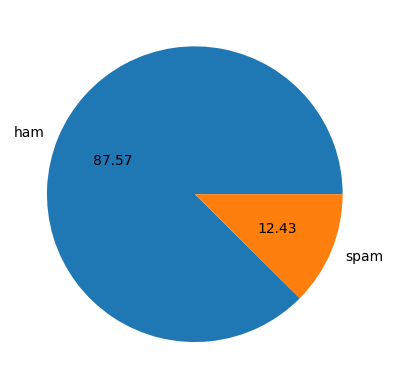

In [133]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels = ['ham', 'spam'], autopct="%0.2f")
plt.show()

In [134]:
import nltk

In [135]:
# nltk.download('punkt')

### We will count The no. of words in a message , No of Senentce and no. of letters 
- words = ayush  == [1]
- letter = a y u s h == [5]
- sentence = i am ayush . seperated by '.' or ','

In [136]:
df['num_characters'] = df['text'].apply(len) ## No of Characters [Letters] - into a array 

In [137]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) ### Length nltk.word_t
## count the words 

In [138]:
df.head(3);

In [139]:
df['num_sentences'] =df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [140]:
df.head(4) 

### letter/character --- apply.len()
### words --- apply (lambda x : len( nltk.word_tokenize(x) ) )
### Sentence --- apply( lambda x : len(nltk.sent_tokenize (x) ))

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [141]:
df['num_characters'].nunique()

276

In [142]:
# df[] ## it will directly go any column
## df [ [] ] ## filter columns 

df[['num_characters', 'num_words', 'num_sentences']]
df[['num_characters', 'num_words', 'num_sentences']].describe()
## Data have outlies 

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [143]:
### Checking describes of only not spam ; spam 
df[df['target'] == 0 ][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [144]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [145]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

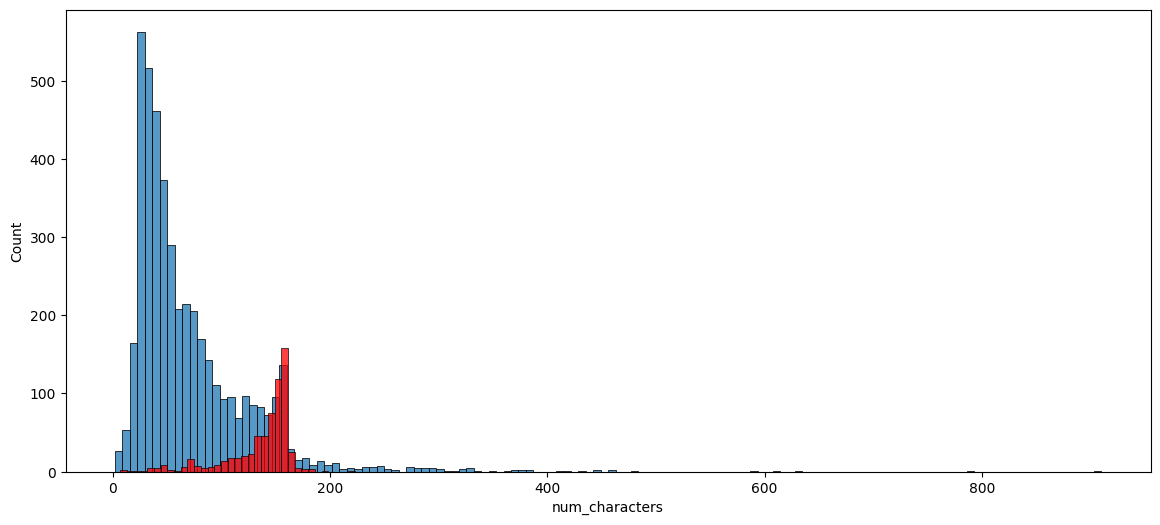

In [146]:
plt.figure(figsize=(14,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

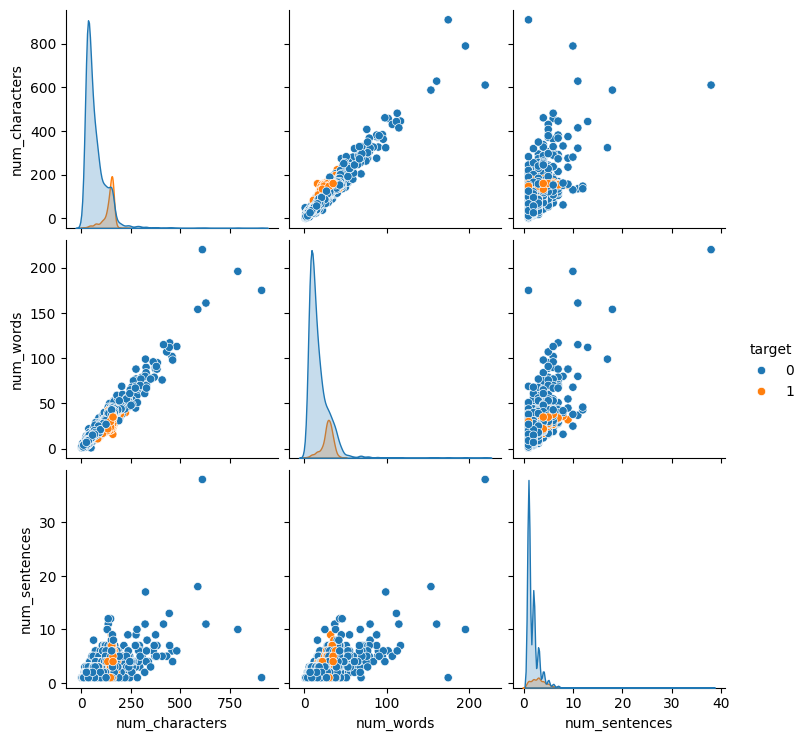

In [147]:
sns.pairplot(df,hue = 'target')

<Axes: >

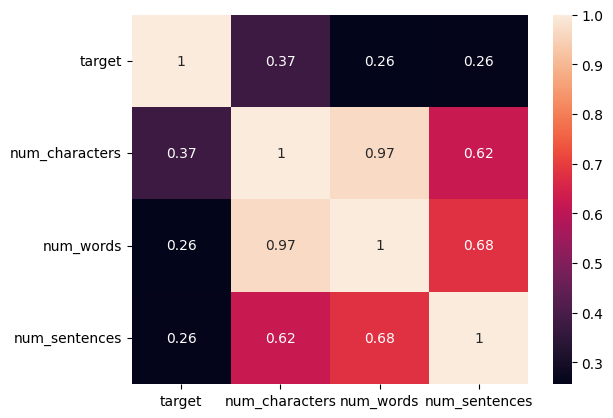

In [148]:
corr_matrix = df.loc[:, ['target','num_characters', 'num_words', 'num_sentences']].corr()
sns.heatmap(corr_matrix, annot=True)

### Data Preprocessing 

- Lower Case -- lower() -- all characters are lower case 
- Tokenization -- Change into A array like split in the array.... 
- Removing Special Characters -- ^ & * etc
- Removing Stop Words and punctuation -- Stop Words -- like he, you is and -- words that don't matter in senentce 
- Stemming -- words change into Root words like lover, loving , loves - love ,  

In [149]:
nltk.word_tokenize('Go until jurong point, crazy.. Available only')

['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only']

In [150]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text);
    
    y = [i for i in text if i.isalnum()]
    
    y = [i for i in y if i not in stopwords.words('english') and i not in string.punctuation]
    
    y = [ps.stem(i) for i in y]
    
    return " ".join(y)

In [151]:
# transform_text('Hey i am NEW H ')
transform_text("I'm gonna be .")


'gon na'

In [152]:
df['transformed_text'] = df['text'].apply(transform_text)

In [153]:
df.head(2)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [154]:
# %pip install wordcloud

In [155]:
from wordcloud import WordCloud 

In [156]:
wc = WordCloud(width=500,height=500,min_font_size=10)

In [157]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


In [158]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


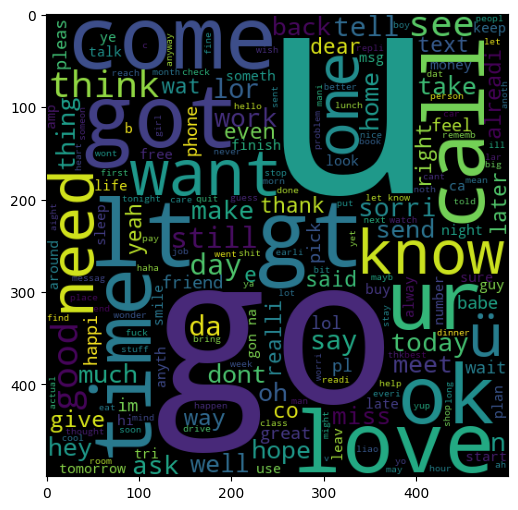

In [159]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

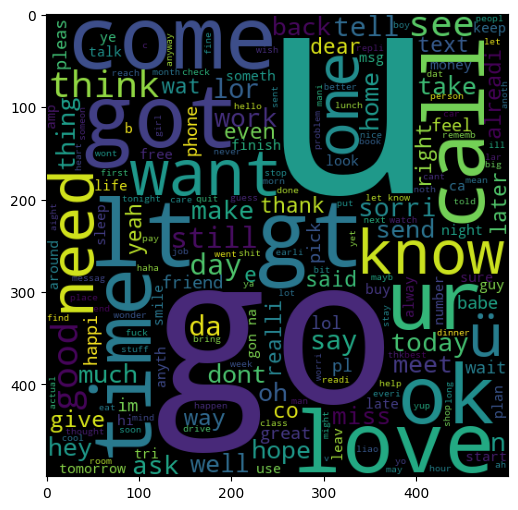

In [160]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [161]:
df.head(1)


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [162]:
df['num_characters'].unique()

array([111,  29, 155,  49,  61, 147,  77, 160, 157, 154, 109, 136, 196,
        35, 149,  26,  81,  56,  41,  47,  52,  88,  57, 144,  30, 134,
        75,  64, 130, 188,  84, 158, 122,  28,  27,  82, 142, 172,  19,
        72,  32,  45,  31,  67, 148,  58, 124,  80, 289, 120,  76,  34,
        22,  40, 108,  48,  25, 110, 152, 159,  78,  46,  42,  20,  43,
        73,  50,  36,  14,  55, 121, 194, 141, 137, 107,  33,  51, 178,
       183,  44,  95, 115,  96, 143, 156, 151,  71,  86,  53,  38, 244,
         9,  39, 125, 162,  85,  59, 384, 145,  74,  66,  93, 104,  65,
       146, 126,  23,  24, 185,  37,  92,  63, 131, 174, 161, 119,  69,
       165,  83, 150, 179,  97,   3, 133,   8,   7,   4,  21, 153,  90,
       138,  79, 128, 232, 129, 202, 168,  15,  54, 300, 102, 118, 221,
       204, 114,  60,  94, 106, 248,  68,  89,  17,  13, 105,  62, 175,
       298,  18,  16, 117, 166,  99, 167, 177, 169, 101, 281, 127,  70,
       103, 140,  87, 123, 100, 316, 195, 226, 135, 112,  98, 21

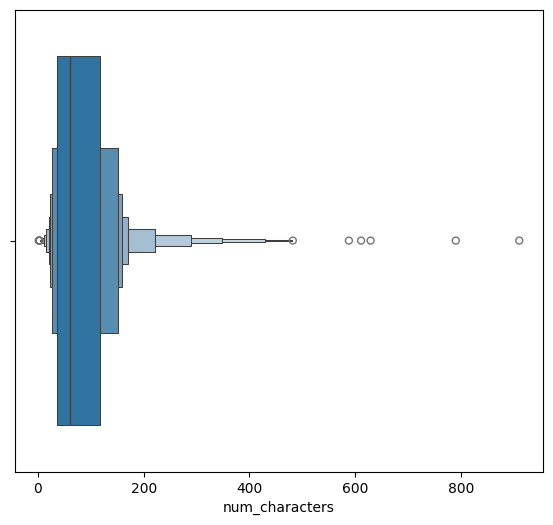

In [163]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxenplot(x =df['num_characters'])
plt.show()

### Taking out outliers 

In [164]:
q1 = df['num_characters'].quantile(0.25)
q3 = df['num_characters'].quantile(0.75)
iqr = q3 - q1 
lower_bound = q1 - 1.5 * iqr 
upper_bound = q3 + 1.5 * iqr 

df = df[(df['num_characters'] >= lower_bound) & (df['num_characters'] <= upper_bound)]

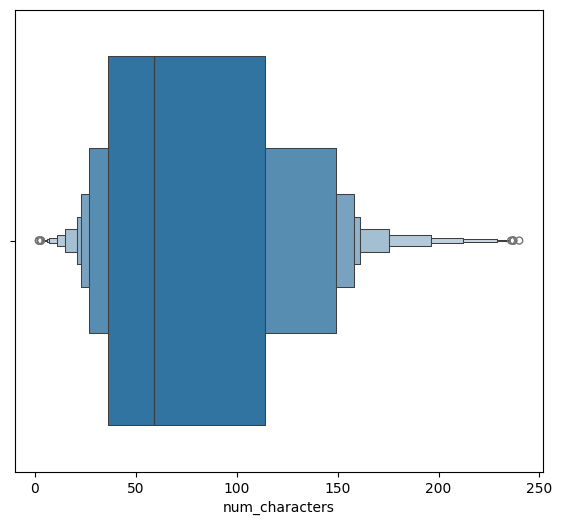

In [165]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxenplot(x = df['num_characters'])

plt.show()

In [166]:
df.shape

(5091, 6)

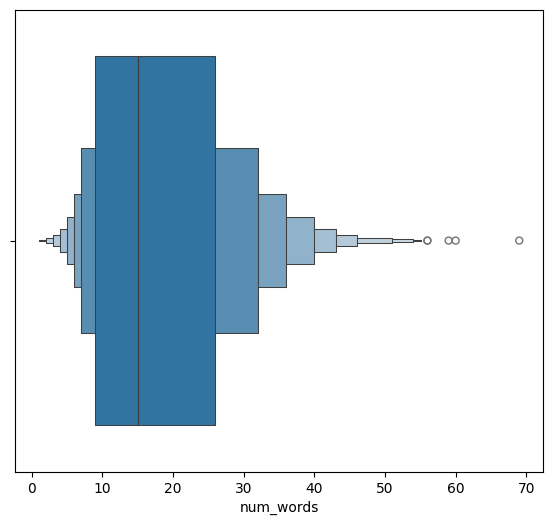

In [167]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxenplot(x = df['num_words'])

plt.show()

In [168]:
Q1 = df['num_sentences'].quantile(0.25)
Q3 = df['num_sentences'].quantile(0.75)
IQr = Q3 - Q1 
lower = Q1 - 1.5 * IQr
upper = Q3 + 1.5 * IQr


# df = df[(df['num_characters'] >= lower_bound) & (df['num_characters'] <= upper_bound)]

df = df [(df['num_sentences'] >= lower) & (df['num_sentences'] <= upper)]

In [169]:
df.shape

(4553, 6)

In [170]:
q1_word = df['num_words'].quantile(0.25)
q3_word = df['num_words'].quantile(0.75)
iQr = q3_word - q1_word
lower_word = q1_word - 1.5 * iQr 
upper_word = q3_word + 1.5 * iQr 

df = df[ (df['num_words'] >= lower_word) & (df['num_words'] <= upper_word)]

In [171]:
df.shape

(4524, 6)

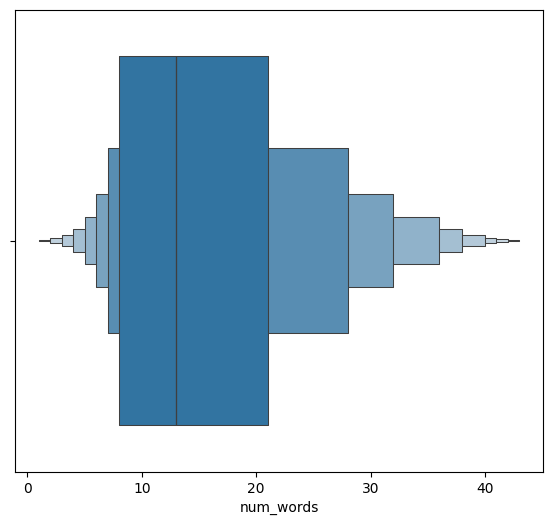

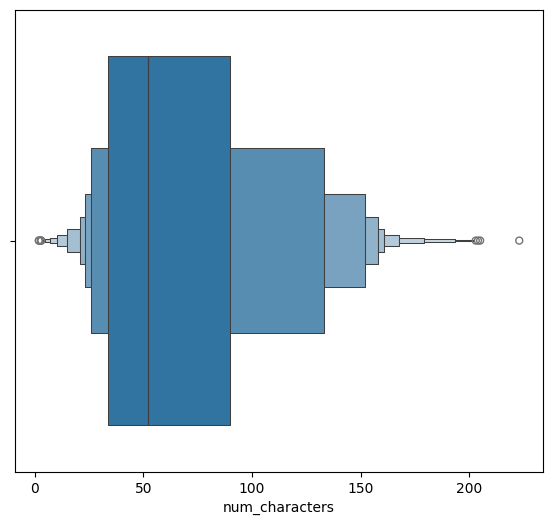

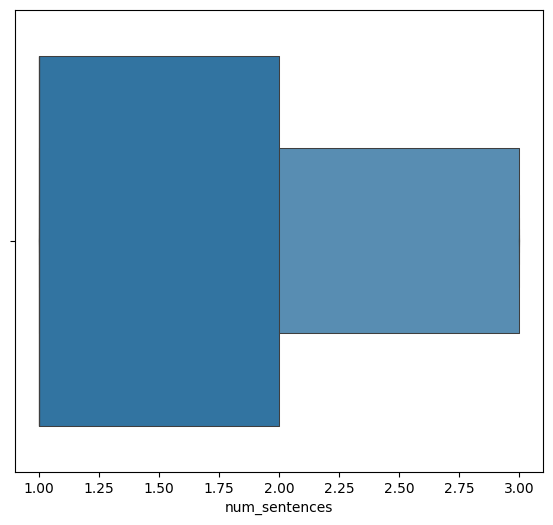

In [172]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxenplot(x=df['num_words'])
plt.show()

plt.figure(figsize= (15,6))
plt.subplot(1,2,1)
sns.boxenplot(x = df['num_characters'])
plt.show()

plt.figure(figsize= (15,6))
plt.subplot(1,2,1)
sns.boxenplot(x = df['num_sentences'])
plt.show()




In [173]:
df.shape

(4524, 6)

In [174]:
df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [175]:
### get The Top Words From both Spam or Not Spam 

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [176]:
len(spam_corpus)

6304

In [177]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

In [178]:
ham_corpus = []

for msg  in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [179]:
len(ham_corpus)

28338

In [180]:
### Text Vectorization 
# Using Bag of words 
df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


### 4. Model Building 

In [181]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)



In [182]:
x = tfidf.fit_transform(df['transformed_text']).toarray()
# x = cv.fit_transform(df['transformed_text']).toarray()

In [183]:
x
print(x.shape)

(4524, 3000)


In [184]:
y = df['target'].values 

In [185]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(4524,))

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score

In [187]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [188]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [189]:
gnb.fit(x_train,y_train)
y_pred1 =  gnb.predict(x_test)
accuracy_score(y_test,y_pred1)
precision_score(y_test,y_pred1) 
print(f'accuracy_score {accuracy_score(y_test,y_pred1) , 'precision_score',  {precision_score(y_test,y_pred1)}}')

## For us precision score is more important because this is a imbalance 


accuracy_score (0.8662983425414365, 'precision_score', {0.39880952380952384})


In [190]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(f'accuracy_score {accuracy_score(y_test,y_pred2) , 'precision_score',  {precision_score(y_test,y_pred2)}}')

accuracy_score (0.9767955801104973, 'precision_score', {1.0})


In [191]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(f'accuracy_score {accuracy_score(y_test,y_pred3) , 'precision_score',  {precision_score(y_test,y_pred3)}}')

accuracy_score (0.9823204419889503, 'precision_score', {1.0})


### this Score is good but we will each try and checking 

In [192]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(x_train)
# X_test = scaler.transform(x_test)

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier


In [194]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mbm = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l2')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=  50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [195]:
clfs = {
  'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [196]:
# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
    
#     return accuracy,precision

In [197]:
# train_classifier(svc,x_train,y_train,x_test,y_test)


In [198]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [199]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [200]:
# performance_df

In [201]:
# performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.925967,1.000000
2,NB,0.976796,1.000000
5,RF,0.974586,0.984848
8,ETC,0.980110,0.972603
6,AdaBoost,0.940331,0.971429
9,GBDT,0.960221,0.947368
0,SVC,0.976796,0.934211
4,LR,0.959116,0.931034
7,BgC,0.974586,0.921053
3,DT,0.946961,0.830508


In [202]:
# sns.catplot(x= 'Algorithm',y = 'value',
#             hue = 'variable', data=performance_df1,kind = 'bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()


In [203]:
## Model improve 
# 1. Change the max_features parameter of tfIdf

# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accurart_Scaling':accuracy_scores, 'Precicsion_scaling' : precision_scores}).sort_values('Precicsion_scaling',ascending=False)

In [204]:
# temp_df

In [205]:
# ## voting Classifer 
# svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier

# voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')


In [206]:
# voting.fit(x_train,y_train)

In [207]:
# y_pred = voting.predict(x_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [208]:
# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator = RandomForestClassifier()

In [209]:
# from sklearn.ensemble import StackingClassifier
# clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [210]:
# clf.fit(x_train,y_train)
# y_pred = clf.predict(x_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))


In [211]:
# %pip install pickle 

In [212]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb')) ## This is changing the text into vectorizeration 
pickle.dump(mnb,open('model.pkl','wb')) ## This is the model -- Which predict 

In [220]:
df[df['target'] == 1]['text'][9]

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'